# 1. Linear Regression
### 공부시간에 따른 시험 점수

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("LinearRegressionData.csv")

In [3]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [4]:
#dataset.iloc[low,col]
# X는 독립변수이므로 -1 즉 스코어 전까지(독립 변수-원인)
X=dataset.iloc[:,:-1].values
# 마지막 컬럼데이터 (종속 변수 -결과)
Y=dataset.iloc[:,-1].values

In [5]:
X,Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [6]:
# linear_modeln import LinearRegressionfrom sklearn.
from sklearn.linear_model import LinearRegression
reg=LinearRegression() #객체생성
reg.fit(X,Y) #학습 [모델 생성]

LinearRegression()

In [7]:
y_pred=reg.predict(X)# X에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

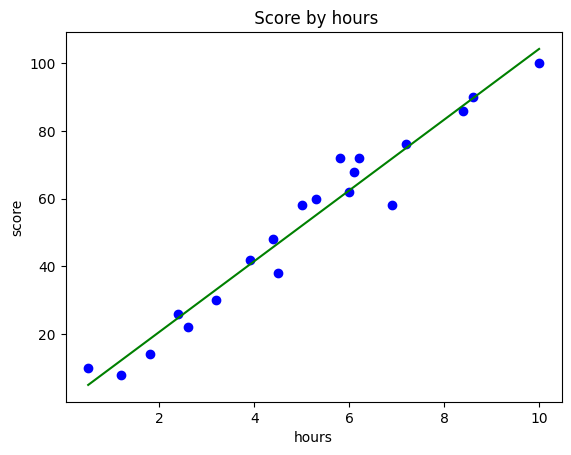

In [8]:
plt.scatter(X,Y,color='blue') # 산점도
plt.plot(X,y_pred,color='green')# 선그래프
plt.title(' Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [9]:
print('9시간 공부했을떄 예상점수:',reg.predict([[9]]))

9시간 공부했을떄 예상점수: [93.77478776]


In [10]:
reg.coef_ #기울기

array([10.44369694])

In [11]:
reg.intercept_#y절편
# 수식 y=10.4436x-0.2184

-0.218484702867201

### 데이터세트분리

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
dataset=pd.read_csv("LinearRegressionData.csv")


In [13]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,:-1].values

In [14]:
from sklearn.model_selection import train_test_split # x,y train x,ytest를 가져온다
#훈련세트 80 :테스트 20
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [15]:
X,len(X) #전체데이터 X,갯수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [16]:
#훈련세트
X_train,len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [17]:
X_test,len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

### 분리된 데이터를 통한 모델링

In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()


In [19]:
reg.fit(X_train,y_train)#훈련세트로 모델을 만든다

LinearRegression()

### 데이터 시각화(훈련데이터)

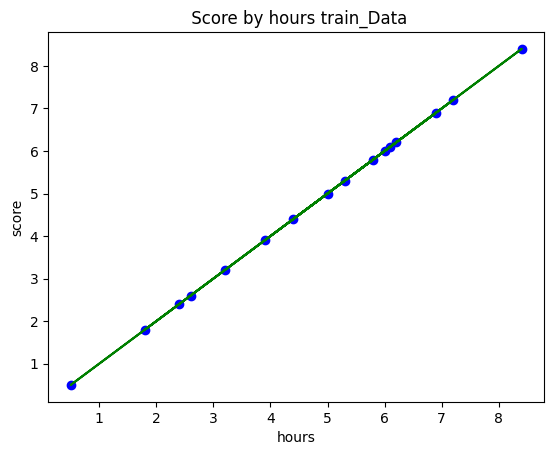

In [20]:
plt.scatter(X_train,y_train,color='blue') # 산점도
plt.plot(X_train,reg.predict(X_train),color='green')# 선그래프
plt.title(' Score by hours train_Data')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (테스트 데이터)

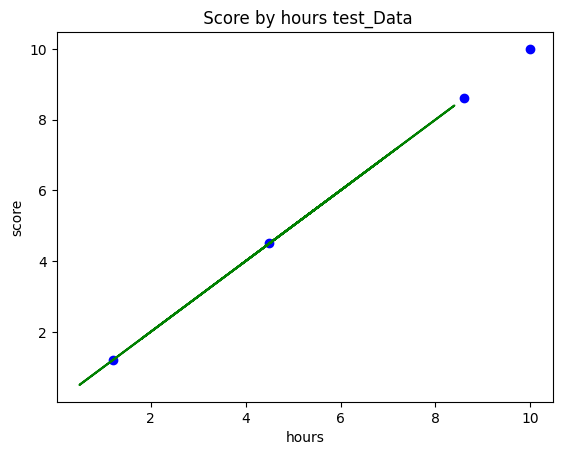

In [21]:
plt.scatter(X_test,y_test,color='blue') # 산점도
plt.plot(X_train,reg.predict(X_train),color='green')# 모델을 만든 것 대로 둔다
plt.title(' Score by hours test_Data')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [22]:
reg.coef_

array([[1.]])

In [23]:
reg.intercept_

array([3.55271368e-15])

### 모델평가

In [24]:
reg.score(X_test,y_test) # 테스트 세트를 통한 모델평가

1.0

In [25]:
reg.score(X_train,y_train)

1.0

### 경사 하강법(Gradient Descent)

max_iter: 훈련세트 반복횟수(Epoch 횟수)  

eta0:학습률(learning rte)

In [70]:
from sklearn.linear_model import SGDRegressor # SGD: Stochastic Gradient Descent 확률적 경사 하강법
# 지수 표기법 
#1e-3:0.001(10^-3)
#1e-4:0.0001(10^-4)
#1e+3:1000(10^3)


# sr=SGDRegressor(max_iter=200,eta0=1e-4,random_state=0,verbose=1)
sr=SGDRegressor()

sr.fit(X_train,y_train)

/Users/sol/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

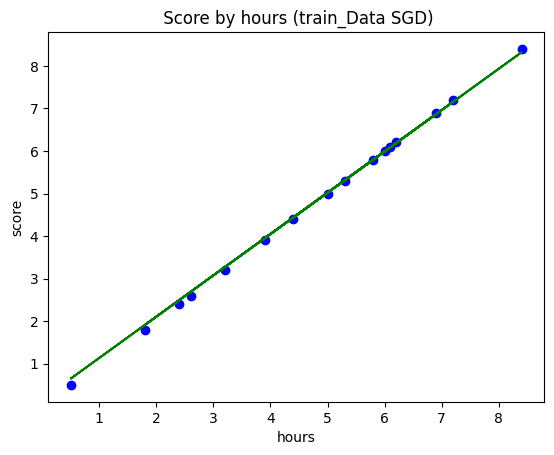

In [75]:
plt.scatter(X_train,y_train,color='blue') # 산점도
plt.plot(X_train,sr.predict(X_train),color='green')# 모델을 만든 것 대로 둔다
plt.title(' Score by hours (train_Data SGD)',)
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [76]:
sr.coef_,sr.intercept_

(array([0.97149469]), array([0.16222111]))

In [77]:
sr.score(X_test,y_test)



0.9991774634312951

In [78]:

sr.score(X_train,y_train)

0.9990189418078361